In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import io
import base64

match = pd.read_json('./data/match.json')
team = pd.read_csv('./data/team.csv')
team_attr = pd.read_csv('./data/team_attr.csv')
team_attr = pd.merge(team_attr, team, left_on='team_api_id',
                     right_on='team_api_id')


def match_viz(match_select):
    spec_match = match[match['match_api_id'] == match_select]
    home = spec_match['home_team_api_id']
    away = spec_match['away_team_api_id']
    home_attr = team_attr[team_attr['team_api_id'] == home.item()]
    home_attr = home_attr.head(1)
    away_attr = team_attr[team_attr['team_api_id'] == away.item()]
    away_attr = away_attr.head(1)
    f_s_attr = home_attr.append(away_attr)
    f_s_attr1 = f_s_attr[['buildUpPlaySpeed', 'buildUpPlayPassing',
                          'chanceCreationPassing', 'chanceCreationShooting', 'chanceCreationCrossing',
                          'defencePressure', 'defenceAggression', 'defenceTeamWidth']]
    f_s_attr1 = f_s_attr1.set_index(f_s_attr['team_long_name'])
    N = len(f_s_attr1.columns)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    #ax.xticks(angles[:-1], f_s_attr1.columns)
    ax.set_xticks((angles[:-1],f_s_attr1.columns), minor=False)
    ax.set_rlabel_position(0)
    ax.yticks([10, 20, 30, 40, 50, 60, 70], ["10", "20", "30",
                                              "40", "50", "60", "70"], color="grey", size=7)
    fig.ylim(0, 75)
    values = f_s_attr1.loc[f_s_attr1.index[0]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,
            linestyle='solid', label=f_s_attr1.index[0])
    ax.fill(angles, values, 'b', alpha=0.1)
    values = f_s_attr1.loc[f_s_attr1.index[1]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,
            linestyle='solid', label=f_s_attr1.index[1])
    ax.fill(angles, values, 'r', alpha=0.1)
    buf = io.BytesIO()
    fig.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    fig.show()


match_viz(1980062)


TypeError: '<' not supported between instances of 'str' and 'float'

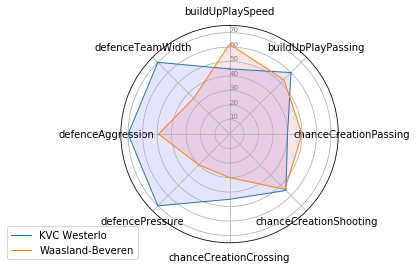

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import io
import base64

match = pd.read_json('data/match.json')
team = pd.read_csv('data/team.csv')
team_attr = pd.read_csv('data/team_attr.csv')
team_attr = pd.merge(team_attr, team, left_on='team_api_id',
                     right_on='team_api_id')


def match_viz(match_select):
    spec_match = match[match['match_api_id'] == match_select]
    home = spec_match['home_team_api_id']
    away = spec_match['away_team_api_id']
    home_attr = team_attr[team_attr['team_api_id'] == home.item()]
    home_attr = home_attr.head(1)
    away_attr = team_attr[team_attr['team_api_id'] == away.item()]
    away_attr = away_attr.head(1)
    f_s_attr = home_attr.append(away_attr)
    f_s_attr1 = f_s_attr[['buildUpPlaySpeed', 'buildUpPlayPassing',
                          'chanceCreationPassing', 'chanceCreationShooting', 'chanceCreationCrossing',
                          'defencePressure', 'defenceAggression', 'defenceTeamWidth']]
    f_s_attr1 = f_s_attr1.set_index(f_s_attr['team_long_name'])
    N = len(f_s_attr1.columns)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], f_s_attr1.columns)
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30, 40, 50, 60, 70], ["10", "20", "30",
                                              "40", "50", "60", "70"], color="grey", size=7)
    plt.ylim(0, 75)
    values = f_s_attr1.loc[f_s_attr1.index[0]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,
            linestyle='solid', label=f_s_attr1.index[0])
    ax.fill(angles, values, 'b', alpha=0.1)
    values = f_s_attr1.loc[f_s_attr1.index[1]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,
            linestyle='solid', label=f_s_attr1.index[1])
    ax.fill(angles, values, 'r', alpha=0.1)
    buf = io.BytesIO()
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    buf = io.BytesIO()
    plt.savefig(buf,format='png')
    buf.seek(0)
    img_str = 'data:image/png;base64,' + base64.b64encode(buf.read()).decode('UTF-8')
    header, encoded = img_str.split(",", 1)
    data = base64.b64decode(encoded)
    with open("./imageToSave.png", "wb") as fh:
        fh.write(data)
        #fh.write(base64.decodebytes(data))


match_viz(1980062)


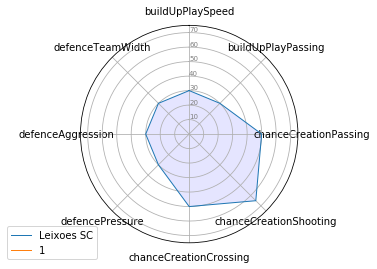

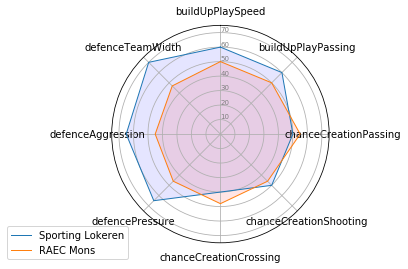

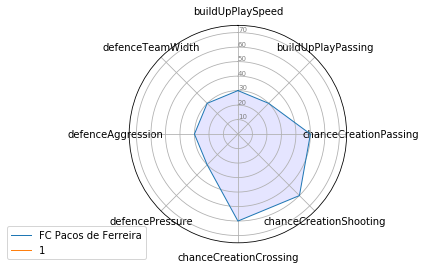

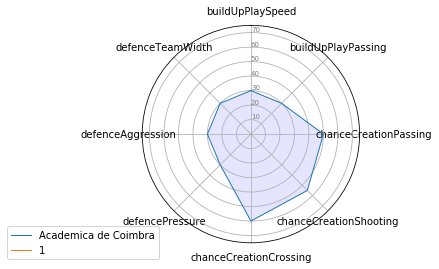

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

match = pd.read_json('data/match.json')
team = pd.read_csv('data/team.csv')
team_attr = pd.read_csv('data/team_attr.csv')
team_attr = pd.merge(team_attr, team, left_on='team_api_id',
                     right_on='team_api_id')

def match_viz(match_select):
    spec_match = match[match['match_api_id']==match_select]
    home = spec_match['home_team_api_id']
    away = spec_match['away_team_api_id']
    home_attr=team_attr[team_attr['team_api_id']==home.item()]
    home_attr=home_attr.head(1)
    away_attr=team_attr[team_attr['team_api_id']==away.item()]
    away_attr=away_attr.head(1)
    f_s_attr=home_attr.append(away_attr)
    f_s_attr1 = f_s_attr[['buildUpPlaySpeed','buildUpPlayPassing',
    'chanceCreationPassing','chanceCreationShooting','chanceCreationCrossing',                     
    'defencePressure','defenceAggression','defenceTeamWidth']]
    f_s_attr1=f_s_attr1.set_index(f_s_attr['team_long_name'])
    f_s_attr1.fillna("null")
    f_s_attr1.replace('null',0)
    f_s_attr1.loc[len(f_s_attr1)] = 0
    f_s_attr1.loc[len(f_s_attr1)] = 0
    N = len(f_s_attr1.columns)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], f_s_attr1.columns)
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30,40,50,60,70], ["10","20","30","40","50","60","70"], color="grey", size=7)
    plt.ylim(0,75)
    values=f_s_attr1.loc[f_s_attr1.index[0]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f_s_attr1.index[0])
    ax.fill(angles, values, 'b', alpha=0.1)
    values=f_s_attr1.loc[f_s_attr1.index[1]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f_s_attr1.index[1])
    ax.fill(angles, values, 'r', alpha=0.1)
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

match_viz(509223)

match_viz(492567)

match_viz(509204)

match_viz(509133)

<class 'numpy.datetime64'>


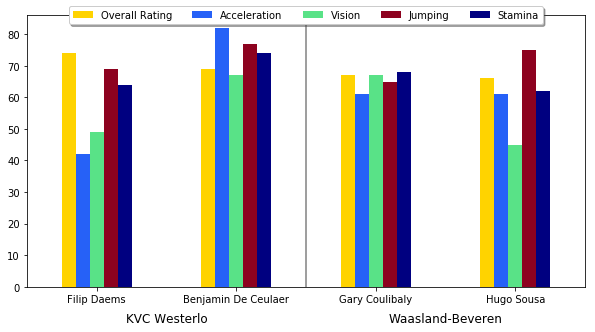

In [34]:
import pandas as pd
import numpy as np
import math
import io
import base64


player_df = pd.read_csv('data/player.csv')
player_attr_df = pd.read_csv('data/player_attr_1.csv')
team_attr_df = pd.read_csv('data/team_attr.csv')
team_df = pd.read_csv('data/team.csv')

match_df = pd.read_json('data/match.json')


player_full_df = pd.merge(player_df, player_attr_df, on="player_api_id")
player_full_df = player_full_df.drop(columns=["id_x", "id_y", "player_fifa_api_id_y"])
player_full_df = player_full_df.rename({"player_fifa_api_id_x" : "player_fifa_api_id"}, axis="columns")


def match_compare_players(match_id):
    
    match_row = match_df[match_df["match_api_id"] == match_id]
    
    match_date = match_row["date"].values[0]
    match_players_home = np.round(match_row[match_row.columns[55:66]].values.astype(np.double)).astype(int)[0]
    match_players_away = np.round(match_row[match_row.columns[66:77]].values.astype(np.double)).astype(int)[0]

    top_home_df = pd.DataFrame(columns=player_full_df.columns)

    for player_id in match_players_home:
        player = player_full_df[player_full_df["player_api_id"] == player_id]
        player = player[player["date"].astype(str) <= match_date.astype(str)].head(1)
        top_home_df = top_home_df.append(player)

    top_home_df = top_home_df.sort_values(by=["overall_rating"], ascending=False)
    top_home_ids = top_home_df["player_api_id"].head(2).values

    top_away_df = pd.DataFrame(columns=player_full_df.columns)

    for player_id in match_players_away:
        player = player_full_df[player_full_df["player_api_id"] == player_id]
        player = player[player["date"].astype(str) <= match_date.astype(str)].head(1)
        top_away_df = top_away_df.append(player)

    top_away_df = top_away_df.sort_values(by=["overall_rating"], ascending=False)
    top_away_ids = top_away_df["player_api_id"].head(2).values
    
    top_ids = np.concatenate((top_home_ids, top_away_ids), axis=None)
    
    player_index = []
    overall_rating = []
    acceleration = []
    vision = []
    jumping = []
    stamina = []
    
    for player_id in top_ids:
        
        player = player_full_df[player_full_df["player_api_id"] == player_id]
        player = player[player["date"].astype(str) <= match_date.astype(str)].head(1)
        
        player_index.append(player["player_name"].values[0])
        overall_rating.append(player["overall_rating"].values[0])
        acceleration.append(player["acceleration"].values[0])
        vision.append(player["vision"].values[0])
        jumping.append(player["jumping"].values[0])
        stamina.append(player["stamina"].values[0])
        
    player_stat_df = pd.DataFrame({"Overall Rating": overall_rating, "Acceleration": acceleration, "Vision": vision, "Jumping": jumping, "Stamina": stamina},index=player_index)
    compare_vis = player_stat_df.plot.bar(rot=0, figsize=(10, 5), color={"#59E287", "#FFD300", "#8D021F", "#000080", "#2661F7"})
    
    compare_vis.axvline(x=1.5, color="grey")
    
    compare_vis.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, fancybox=True, shadow=True)
    
    home_name = team_df[team_df["team_api_id"] == match_row["home_team_api_id"].values[0]]["team_long_name"].values[0]
    away_name = team_df[team_df["team_api_id"] == match_row["away_team_api_id"].values[0]]["team_long_name"].values[0]
    
    compare_vis.text(0.5, -10, home_name, horizontalalignment='center', verticalalignment='center', fontsize=12)
    compare_vis.text(2.5, -10, away_name, horizontalalignment='center', verticalalignment='center', fontsize=12)
    
    fig = compare_vis.get_figure()
    buf = io.BytesIO()
    fig.savefig(buf,format='png')
    buf.seek(0)
    img_str = 'data:image/png;base64,' + base64.b64encode(buf.read()).decode('UTF-8')
    header, encoded = img_str.split(",", 1)
    data = base64.b64decode(encoded)
    with open("./joseph.png", "wb") as fh:
        fh.write(data)

match_compare_players(1980062)

In [49]:
import numpy as np 
import pandas as pd 
import re
import json

match = pd.read_json('./data/match.json')
team = pd.read_csv('./data/team.csv')

match=pd.merge(match,team,left_on='home_team_api_id',right_on='team_api_id')
match=pd.merge(match,team,left_on='away_team_api_id',right_on='team_api_id')

league = 1729
season = '2008/2009'
match_select = 489043

final_list = []
match1 = match[match['league_id']==league]
match1 = match1[match1['season']==str(season)]
for df_row in range(match1['home_team_api_id'].shape[0]):
    team1 = match1['home_team_api_id'].iloc[df_row]
    team2 = match1['away_team_api_id'].iloc[df_row]
    team1_matches = match1[(match1['home_team_api_id'] ==team1) | (match1['away_team_api_id'] ==team1)]
    team1_matches['match_api_id']=1
    team2_matches = match1[(match1['home_team_api_id'] ==team2) | (match1['away_team_api_id'] ==team2)]
    team2_matches['match_api_id']=1
    spec_match = match1[match1['match_api_id']==match1['match_api_id'].iloc[df_row]]
    stats=['goal','shoton','shotoff','foulcommit','card','cross','corner']
    a=str(team1)
    b=str(team2)
    home_list=[]
    away_list=[]
    for i in stats:
        spec_match.fillna('')
        split_up=re.split('>|<',spec_match[i].iloc[0])
        a=str(spec_match['home_team_api_id'].iloc[0])
        b=str(spec_match['away_team_api_id'].iloc[0])
        home_stats=0
        away_stats=0
        for i in split_up:
            if a in i:
                home_stats+=1

            if b in i:
                away_stats+=1

        home_list.append(home_stats)
        away_list.append(away_stats)
    split_up2=re.split('<homepos>|</homepos>',spec_match['possession'].iloc[0])
    try:
        home_poss=split_up2[7]
    except IndexError:
        home_poss = 0
    home_poss=int(home_poss)
    home_list.append(home_poss)
    split_up3=re.split('<awaypos>|</awaypos>',spec_match['possession'].iloc[0])
    try:
        away_poss=split_up3[7]
    except IndexError:
        away_poss = 0 
    away_poss=int(away_poss)
    away_list.append(away_poss)
    home_list.extend(away_list)
    if match1['match_api_id'].iloc[df_row] == match_select:
        home_list.append(1)
    else:
        home_list.append(0)
    final_list.append(home_list)
comp_stats = pd.DataFrame(final_list, columns = ['Home_Goals','Home_Shots_on_Goal','Home_Shots_off_Goal','Home_Fouls_Committed','Home_Yellow_Red_Cards','Home_Crosses','Home_Corner_Kicks','Home_Possessions','Away_Goals','Away_Shots_on_Goal','Away_Shots_off_Goal','Away_Fouls_Committed','Away_Yellow_Red_Cards','Away_Crosses','Away_Corner_Kicks','Away_Possessions','IsMatchId'])
match_stat_comp = json.loads(comp_stats.to_json(orient='records'))
print(match_stat_comp)

_Red_Cards': 1, 'Home_Crosses': 25, 'Home_Corner_Kicks': 6, 'Home_Possessions': 55, 'Away_Goals': 1, 'Away_Shots_on_Goal': 7, 'Away_Shots_off_Goal': 3, 'Away_Fouls_Committed': 13, 'Away_Yellow_Red_Cards': 2, 'Away_Crosses': 16, 'Away_Corner_Kicks': 7, 'Away_Possessions': 45, 'IsMatchId': 0}, {'Home_Goals': 4, 'Home_Shots_on_Goal': 10, 'Home_Shots_off_Goal': 11, 'Home_Fouls_Committed': 11, 'Home_Yellow_Red_Cards': 0, 'Home_Crosses': 9, 'Home_Corner_Kicks': 8, 'Home_Possessions': 60, 'Away_Goals': 3, 'Away_Shots_on_Goal': 4, 'Away_Shots_off_Goal': 9, 'Away_Fouls_Committed': 17, 'Away_Yellow_Red_Cards': 0, 'Away_Crosses': 11, 'Away_Corner_Kicks': 5, 'Away_Possessions': 40, 'IsMatchId': 0}, {'Home_Goals': 2, 'Home_Shots_on_Goal': 3, 'Home_Shots_off_Goal': 6, 'Home_Fouls_Committed': 17, 'Home_Yellow_Red_Cards': 2, 'Home_Crosses': 36, 'Home_Corner_Kicks': 6, 'Home_Possessions': 54, 'Away_Goals': 1, 'Away_Shots_on_Goal': 9, 'Away_Shots_off_Goal': 9, 'Away_Fouls_Committed': 15, 'Away_Yellow_Re

In [48]:
# prep.head()
#prep.where(prep['IsMatchId'].isnull()==True)
#prep.where(prep['IsMatchId'].isnull()==False).shape
#prep.shape
import json
new = json.loads(prep.to_json(orient='records'))
print(new[0])

{'Home_Goals': 1, 'Home_Shots_on_Goal': 11, 'Home_Shots_off_Goal': 10, 'Home_Fouls_Committed': 16, 'Home_Yellow_Red_Cards': 3, 'Home_Crosses': 24, 'Home_Corner_Kicks': 6, 'Home_Possessions': 55, 'Away_Goals': 1, 'Away_Shots_on_Goal': 1, 'Away_Shots_off_Goal': 9, 'Away_Fouls_Committed': 11, 'Away_Yellow_Red_Cards': 0, 'Away_Crosses': 9, 'Away_Corner_Kicks': 6, 'Away_Possessions': 45, 'IsMatchId': 0}


In [5]:
import numpy as np 
import pandas as pd 
import re
import json

match = pd.read_json('./data/match.json')
team = pd.read_csv('./data/team.csv')

match=pd.merge(match,team,left_on='home_team_api_id',right_on='team_api_id')
match=pd.merge(match,team,left_on='away_team_api_id',right_on='team_api_id')

final_list = []
match1 = match
#for df_row in range(2):
for df_row in range(match1['home_team_api_id'].shape[0]):
    team1 = match1['home_team_api_id'].iloc[df_row]
    team2 = match1['away_team_api_id'].iloc[df_row]
    team1_matches = match1[(match1['home_team_api_id'] ==team1) | (match1['away_team_api_id'] ==team1)]
    team1_matches['match_api_id']=1
    team2_matches = match1[(match1['home_team_api_id'] ==team2) | (match1['away_team_api_id'] ==team2)]
    team2_matches['match_api_id']=1
    spec_match = match1[match1['match_api_id']==match1['match_api_id'].iloc[df_row]]
    stats=['goal','shoton','shotoff','foulcommit','card','cross','corner']
    a=str(team1)
    b=str(team2)
    home_list=[]
    away_list=[]
    for i in stats:
        try:
            spec_match.fillna('')
            split_up=re.split('>|<',spec_match[i].iloc[0])
            a=str(spec_match['home_team_api_id'].iloc[0])
            b=str(spec_match['away_team_api_id'].iloc[0])
            home_stats=0
            away_stats=0
            for i in split_up:
                if a in i:
                    home_stats+=1

                if b in i:
                    away_stats+=1
        except Exception:
            home_stats=0
            away_stats=0
        home_list.append(home_stats)
        away_list.append(away_stats)
    try:
        split_up2=re.split('<homepos>|</homepos>',spec_match['possession'].iloc[0])
    except Exception:
        split_up2 = [1]
    try:
        home_poss=split_up2[7]
    except IndexError:
        home_poss = 0
    home_poss=int(home_poss)
    home_list.append(home_poss)
    try:
        split_up3=re.split('<awaypos>|</awaypos>',spec_match['possession'].iloc[0])
    except Exception:
        split_up3 = [0]
    try:
        away_poss=split_up3[7]
    except IndexError:
        away_poss = 0 
    away_poss=int(away_poss)
    away_list.append(away_poss)
    home_list.extend(away_list)
    temp = [match1['match_api_id'].iloc[df_row]]
    temp.extend(home_list)
    final_list.append(temp)
comp_stats = pd.DataFrame(final_list, columns = ['match_id','Home_Goals','Home_Shots_on_Goal','Home_Shots_off_Goal','Home_Fouls_Committed','Home_Yellow_Red_Cards','Home_Crosses','Home_Corner_Kicks','Home_Possessions','Away_Goals','Away_Shots_on_Goal','Away_Shots_off_Goal','Away_Fouls_Committed','Away_Yellow_Red_Cards','Away_Crosses','Away_Corner_Kicks','Away_Possessions'])

In [7]:
comp_stats.to_csv(r'./match_stats.csv', index=False)

In [6]:
comp_stats

,match_id,Home_Goals,Home_Shots_on_Goal,Home_Shots_off_Goal,Home_Fouls_Committed,Home_Yellow_Red_Cards,Home_Crosses,Home_Corner_Kicks,Home_Possessions,Away_Goals,Away_Shots_on_Goal,Away_Shots_off_Goal,Away_Fouls_Committed,Away_Yellow_Red_Cards,Away_Crosses,Away_Corner_Kicks,Away_Possessions
0,492473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,665353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,838476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1032694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1224064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1227772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25975,1471923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25976,1471649,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25977,1992136,5,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0
